##Credit Risk Default Risk Analysis

Kaggle: https://www.kaggle.com/datasets/pradip11/amexpert-codelab-2021

I discovered the project through a github repo, the guy did a pretty amazing job, so I basically understood and replaced what he did, with some changes and also fixes for updated libaries. Repo: https://github.com/maixbach/credit-risk-analysis-using-ML/tree/main

In [136]:
!pip install imblearn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import statsmodels
import re

In [8]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
!pip install xgboost

In [13]:
from xgboost import XGBClassifier

In [14]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostClassifier

In [16]:
!pip install lightgbm

In [17]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [18]:
from lightgbm import LGBMClassifier

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
import pandas.core.algorithms as algos
import scipy.stats.stats as stats
import traceback
import string

In [23]:
!pip install scorecardpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60629 sha256=c35be4568958cd3f380afbb9a374c1037bc04d63f99ad477a1cdbabb0a573fbb
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [24]:
import scorecardpy as sc

In [25]:
import mlxtend

In [140]:
pd.set_option('display.max_columns', None)

In [141]:
pd.set_option('display.max_colwidth', None)

In [142]:
train = pd.read_csv('train.csv')
train.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [143]:
train["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.918797
1,0.081203


In [144]:
df = train.sample(n = 30000, random_state = 42, replace = False)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
34126,CST_163708,Wachtel,50,F,N,Y,0.0,269502.14,4181.0,Unknown,1.0,0.0,17440.44,36017.45,23,807.0,0,0,0
44609,CST_131305,Deepa,29,F,N,Y,0.0,115795.25,365250.0,Unknown,2.0,0.0,28962.21,21781.38,60,858.0,0,0,0
44264,CST_131350,Jason,39,F,N,Y,0.0,113477.67,365241.0,Unknown,2.0,0.0,27463.96,27485.15,81,667.0,0,0,1
33556,CST_106655,Gilbert Kreijger,35,F,Y,Y,1.0,215555.19,1882.0,Managers,3.0,0.0,47863.75,25054.25,32,690.0,0,0,0
28050,CST_154013,Slater,53,M,Y,Y,0.0,185082.22,365244.0,Unknown,2.0,0.0,47185.73,65186.23,65,721.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37523,CST_113336,Leika Kihara,26,F,N,Y,0.0,95125.83,365244.0,Unknown,1.0,0.0,18408.08,26632.82,2,790.0,0,0,0
36228,CST_151817,Dixon,31,F,N,N,0.0,119277.91,891.0,Laborers,2.0,0.0,18243.68,16150.12,18,791.0,0,0,0
32772,CST_107659,P.J. Huffstutter,50,F,N,N,0.0,214846.93,1740.0,Sales staff,2.0,0.0,16482.42,27253.76,16,709.0,0,0,0
9762,CST_141352,an,25,M,N,Y,0.0,175005.61,653.0,Laborers,2.0,0.0,19366.06,35727.99,9,691.0,0,0,0


# EDA

In [145]:
print(df.shape)

(30000, 19)


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 34126 to 33325
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              30000 non-null  object 
 1   name                     30000 non-null  object 
 2   age                      30000 non-null  int64  
 3   gender                   30000 non-null  object 
 4   owns_car                 29631 non-null  object 
 5   owns_house               30000 non-null  object 
 6   no_of_children           29498 non-null  float64
 7   net_yearly_income        30000 non-null  float64
 8   no_of_days_employed      29685 non-null  float64
 9   occupation_type          30000 non-null  object 
 10  total_family_members     29944 non-null  float64
 11  migrant_worker           29947 non-null  float64
 12  yearly_debt_payments     29938 non-null  float64
 13  credit_limit             30000 non-null  float64
 14  credit_limit_used(%)   

## cat feats - num feats

In [148]:
cat_feats = [col for col in df.columns if df[col].dtypes == "object"]
num_feats =  [col for col in df.columns if df[col].dtypes != "object"]

print("number of cat feats: ", len(cat_feats))
print("number of num feats: ", len(num_feats))

number of cat feats:  6
number of num feats:  13


In [34]:
cat_feats

['customer_id', 'name', 'gender', 'owns_car', 'owns_house', 'occupation_type']

In [35]:
num_feats

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'total_family_members',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months',
 'credit_card_default']

In [36]:
df.duplicated().sum()

0

## isnull()

In [37]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
no_of_children,502
owns_car,369
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
customer_id,0
default_in_last_6months,0
prev_defaults,0


## Xem biến trạng thái default

In [38]:
df["credit_card_default"].value_counts()

,count
credit_card_default,
0,27537
1,2463


In [39]:
df["credit_card_default"].value_counts(normalize=True)

,proportion
credit_card_default,
0,0.9179
1,0.0821


## Fillnan: Categorical features

In [40]:
df[cat_feats].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,369
owns_house,0
occupation_type,0


In [41]:
for i in cat_feats:
    print("Column Name:",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Column Name: customer_id
customer_id
CST_163708    0.000033
CST_131964    0.000033
CST_162494    0.000033
CST_138114    0.000033
CST_102185    0.000033
                ...   
CST_148239    0.000033
CST_130171    0.000033
CST_132131    0.000033
CST_112807    0.000033
CST_129867    0.000033
Name: proportion, Length: 30000, dtype: float64


Column Name: name
name
Jonathan            0.004367
Jonathan Stempel    0.004133
Jessica             0.003600
Sarah               0.003533
David               0.003467
                      ...   
Baker Jonathan      0.000033
Joshua Franklin     0.000033
Fathiya Dahrul      0.000033
Becker              0.000033
Olga Dzyubenko      0.000033
Name: proportion, Length: 3514, dtype: float64


Column Name: gender
gender
F      0.657700
M      0.342267
XNA    0.000033
Name: proportion, dtype: float64


Column Name: owns_car
owns_car
N    0.660862
Y    0.339138
Name: proportion, dtype: float64


Column Name: owns_house
owns_house
Y    0.6962
N    0.3038
Name: 

As there are missing values mostly less than 2%, so, let us impute all missing values with statistical way.
That is, FillNA by MODE if it is categorical variable and FillNA by MEDIAN if it is numerical variable

### Gender

In [42]:
df[df['gender'] == 'XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


In [43]:
# change it to M as the name pronunces as Male
df['gender'] = df['gender'].apply(lambda x: 'M' if x=='XNA' else x)
df['gender'].value_counts()

,count
gender,
F,19731
M,10269


### Owns car

In [44]:
# fill owns_car with mode of the data
df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)

<ipython-input-44-2f7b9ff83468>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owns_car'].fillna(df['owns_car'].mode()[0], inplace=True)


In [45]:
df["owns_car"].value_counts(normalize=True)

,proportion
owns_car,
N,0.665033
Y,0.334967


In [46]:
df[cat_feats].isnull().sum()

,0
customer_id,0
name,0
gender,0
owns_car,0
owns_house,0
occupation_type,0


## Fillnan:  Numerical features

In [47]:
df[num_feats].isnull().sum().sort_values(ascending=False).head(10)

,0
no_of_children,502
no_of_days_employed,315
yearly_debt_payments,62
total_family_members,56
migrant_worker,53
credit_score,6
age,0
net_yearly_income,0
credit_limit,0
credit_limit_used(%),0


### no_of_days_employed

In [48]:
# impute 'no_of_days_employed' with median based on 'occupation_type'
occp_days_employed = df.groupby(by='occupation_type')['no_of_days_employed'].median()

for i in occp_days_employed.index:
    df['no_of_days_employed'] = np.where((df['no_of_days_employed'].isna()) & (df['occupation_type'] == i), occp_days_employed[i], df['no_of_days_employed'])

In [49]:
df.no_of_days_employed.isna().sum()

0

### yearly_debt_payments

In [50]:
# impute 'yearly_debt_payments' with median based on 'credit_card_default'
yearDebt_credit = df.groupby(by='credit_card_default')['yearly_debt_payments'].median()
for i in yearDebt_credit.index:
    df['yearly_debt_payments'] = np.where((df['yearly_debt_payments'].isna()) & (df['credit_card_default'] == i), yearDebt_credit[i], df['yearly_debt_payments'])

In [51]:
df['yearly_debt_payments'].isna().sum()

0

In [52]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

,0
no_of_children,502
total_family_members,56
migrant_worker,53
credit_score,6
age,0


### migrant_worker

In [53]:
df['migrant_worker'].mode()

,migrant_worker
0,0.0


In [54]:
# imputing with mode of the data
df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)

# check null values count
df['migrant_worker'].isna().sum()

<ipython-input-54-62a677eddd60>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['migrant_worker'].fillna(df['migrant_worker'].mode()[0], inplace=True)


0

### total_family_members

In [55]:
# imputing with mode of the data
df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)

# check null values count
df['total_family_members'].isna().sum()

<ipython-input-55-621c7d92bc99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_family_members'].fillna(df['total_family_members'].mode()[0], inplace=True)


0

In [56]:
df[num_feats].isnull().sum().sort_values(ascending = False).head(5)

,0
no_of_children,502
credit_score,6
age,0
net_yearly_income,0
no_of_days_employed,0


### no_of_children

In [57]:
# fill no_of_children with mode of the data
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)

<ipython-input-57-674b7d9c1271>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace=True)


### credit_score

In [58]:
# check medians of credit_score wrt credit_card_default
cred_score = df.groupby(by='credit_card_default')['credit_score'].median()

for i in cred_score.index:
    df['credit_score'] = np.where((df['credit_score'].isna()) & (df['credit_card_default'] == i), cred_score[i], df['credit_score'])

# check for null values in 'credit_score'
df['credit_score'].isna().sum()

0

In [59]:
df[num_feats].isnull().sum().sort_values(ascending = False)

,0
age,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
total_family_members,0
migrant_worker,0
yearly_debt_payments,0
credit_limit,0
credit_limit_used(%),0
credit_score,0


In [60]:
df.isnull().sum()

,0
customer_id,0
name,0
age,0
gender,0
owns_car,0
owns_house,0
no_of_children,0
net_yearly_income,0
no_of_days_employed,0
occupation_type,0


## Concentrated EDA

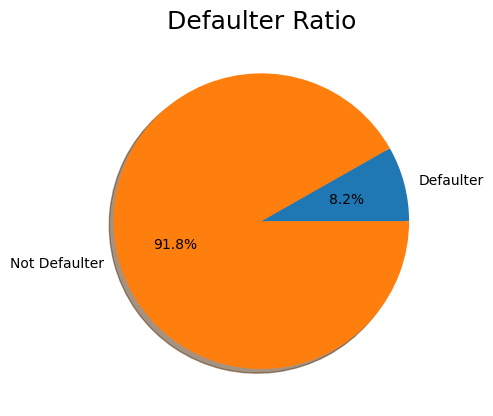

In [61]:
# Ploting Credit_default ratio
total_default_values = df.credit_card_default.value_counts(ascending=True).values

plt.figure()
plt.pie(total_default_values, labels=['Defaulter', 'Not Defaulter'], autopct='%1.1f%%', shadow=True)
plt.title('Defaulter Ratio', fontsize=18)
plt.show()

<ipython-input-62-09eec931f20c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


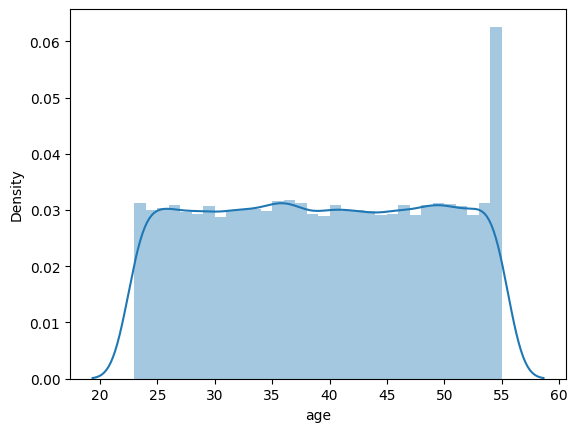

In [62]:
# visualize AGE feature - distplot
plt.figure()
sns.distplot(df['age'])
plt.show()

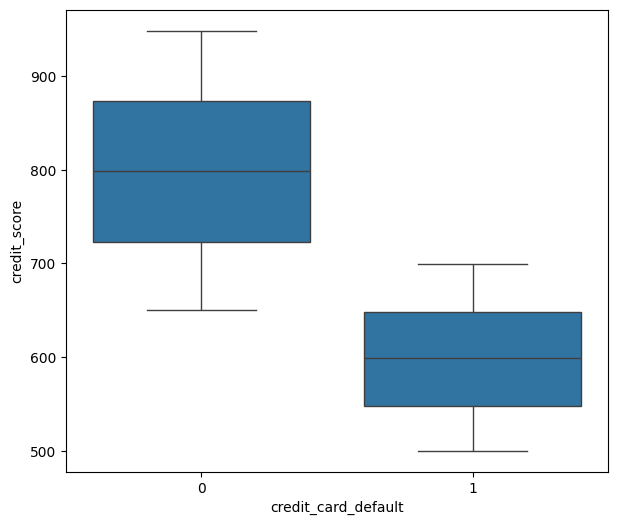

In [67]:
# boxplot of credit_defaulter-credit_score
plt.figure(figsize=(7, 6))
sns.boxplot(x='credit_card_default', y='credit_score', data=df)
plt.show()


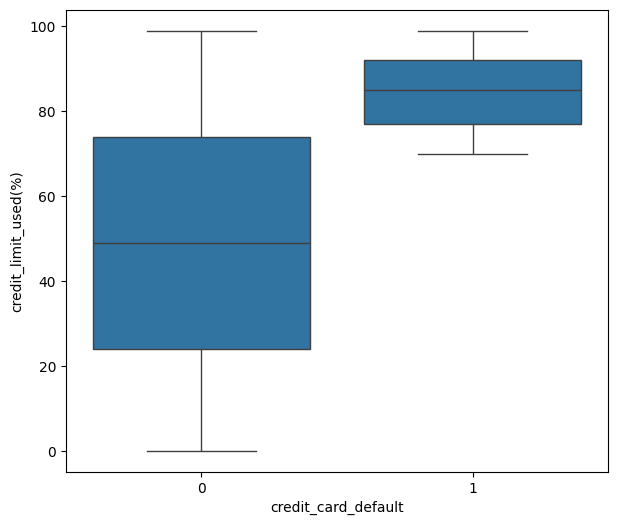

In [69]:
# boxplot of credit_defaulter-credit_limit_utilization
plt.figure(figsize=(7, 6))
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=df)
plt.show()

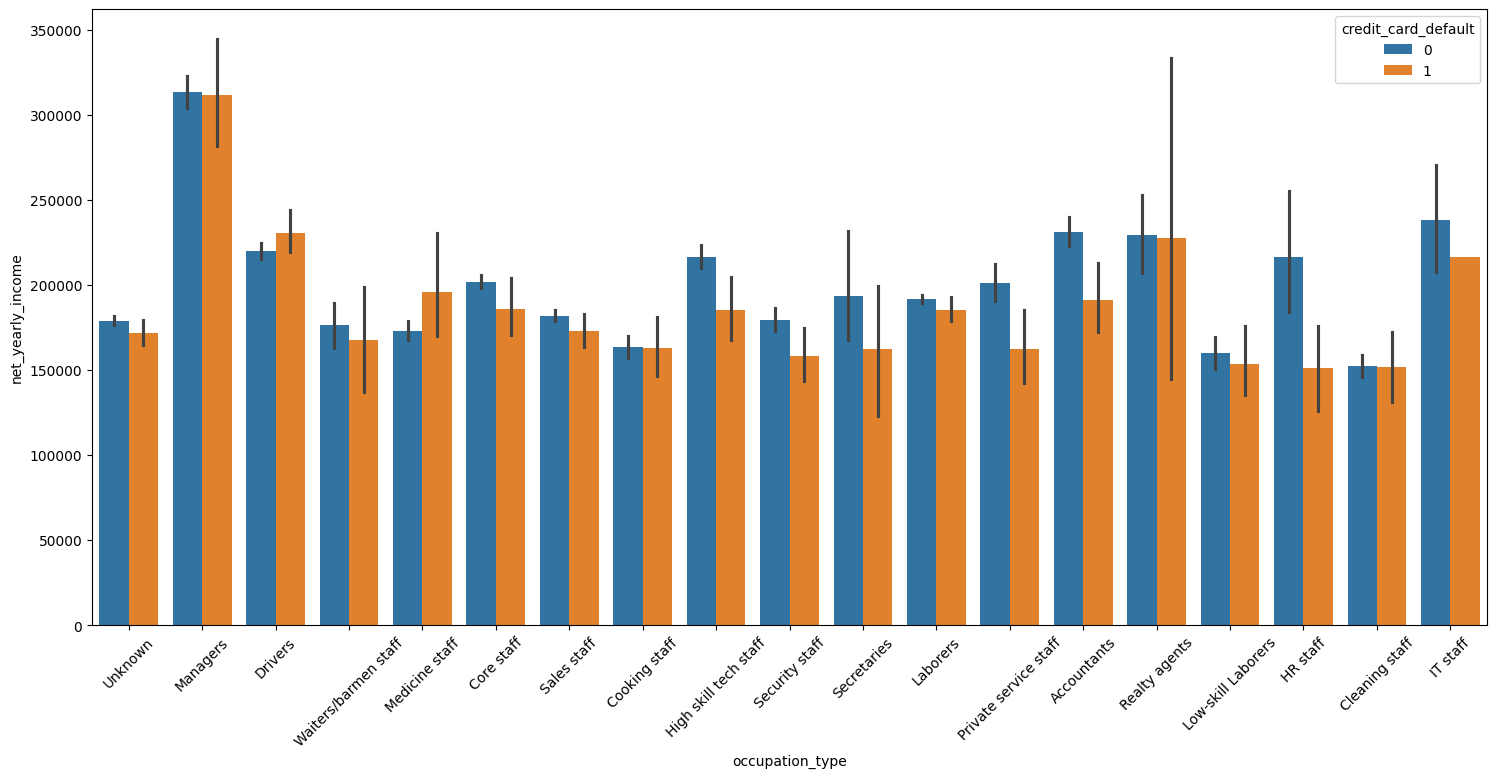

In [70]:
# barplots for occupation types wrt credit_default
plt.figure(figsize=[18,8])
sns.barplot(x=df['occupation_type'], y=df['net_yearly_income'], hue=df['credit_card_default'])
plt.xticks(rotation=45)
plt.show()

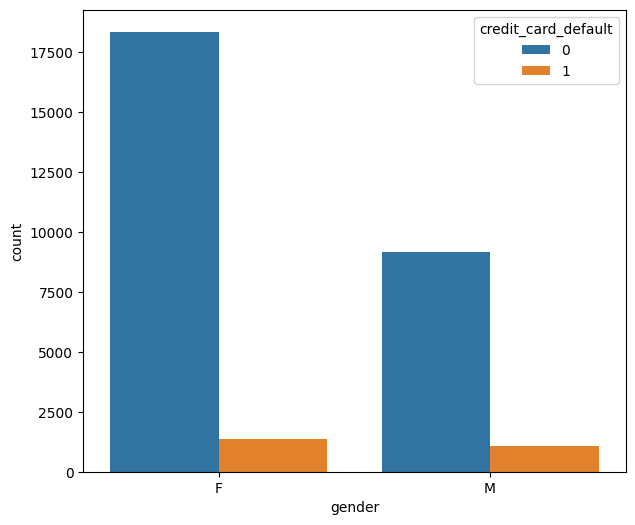

In [72]:
# male or female defaulters
plt.figure(figsize=(7, 6))
sns.countplot(x='gender', hue='credit_card_default', data=df)
plt.show()

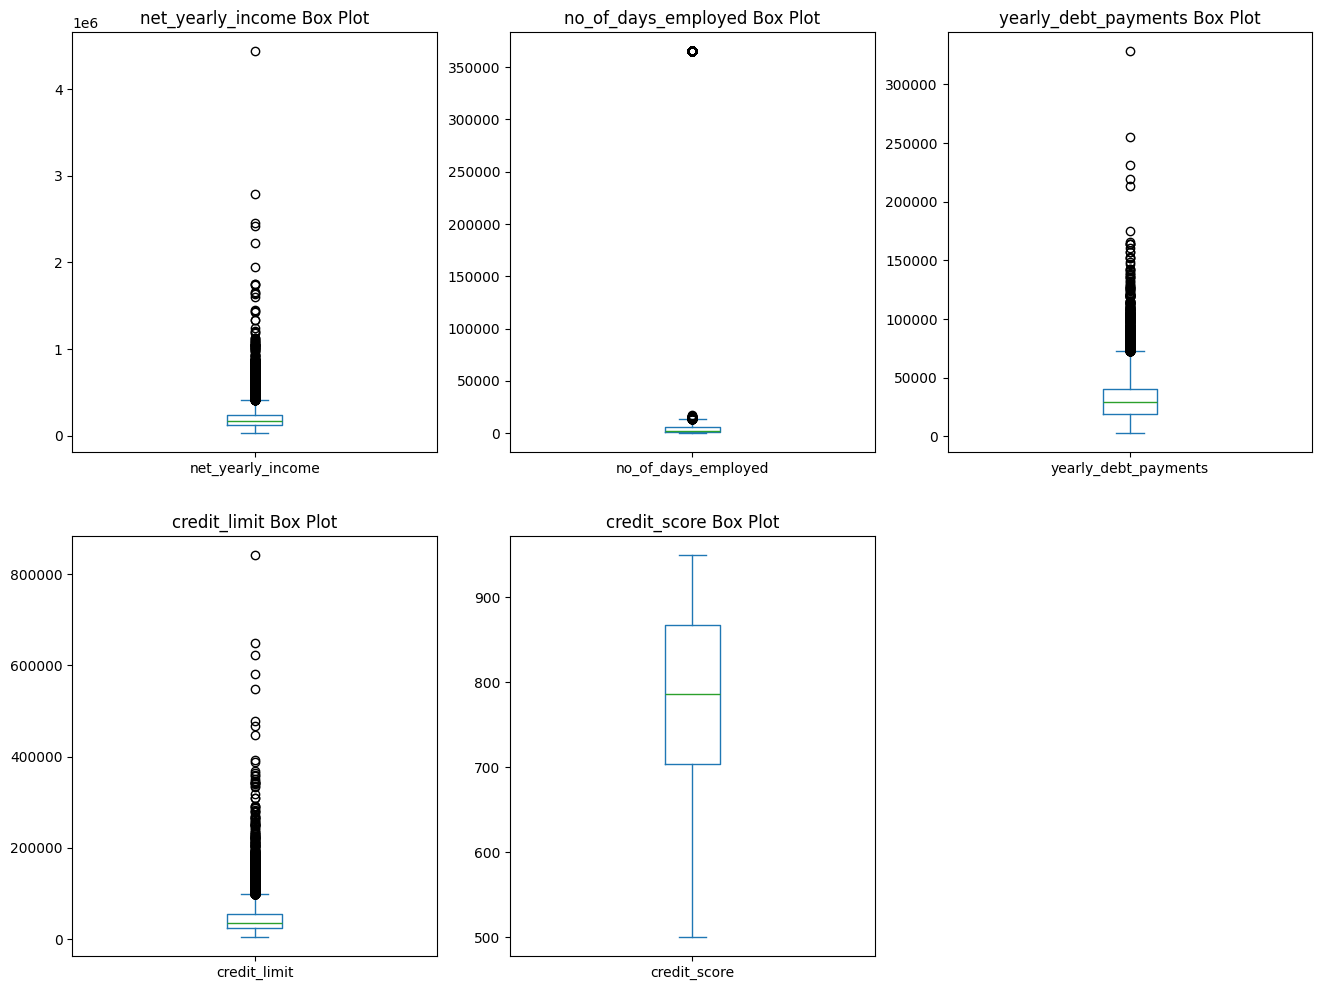

In [73]:
# boxplot of all continuous variables

plt.figure(figsize=[16, 12])
plt.subplot(2,3,1)
df['net_yearly_income'].plot.box()
plt.title('net_yearly_income Box Plot')

plt.subplot(2,3,2)
df['no_of_days_employed'].plot.box()
plt.title('no_of_days_employed Box Plot')

plt.subplot(2,3,3)
df['yearly_debt_payments'].plot.box()
plt.title('yearly_debt_payments Box Plot')

plt.subplot(2,3,4)
df['credit_limit'].plot.box()
plt.title('credit_limit Box Plot')

plt.subplot(2,3,5)
df['credit_score'].plot.box()
plt.title('credit_score Box Plot')
plt.show()

# Data Processing

## Drop columns which have IV < 0.02

In [74]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(pd.Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [81]:
import numpy as np
import pandas as pd

# Define mono_bin function
def mono_bin(Y, X, n=10):
    # Ensure X and Y are 1-dimensional
    if X.ndim > 1:
        raise ValueError("X must be a single column or 1-dimensional array.")
    if Y.ndim > 1:
        raise ValueError("Y must be a single column or 1-dimensional array.")

    # Filter out missing values
    notmiss = pd.DataFrame({"X": X, "Y": Y}).dropna()

    # Create quantile-based bins
    bins = np.quantile(notmiss["X"], np.linspace(0, 1, n))

    # Ensure bins are unique
    bins = np.unique(bins)

    # Apply binning
    notmiss["Bucket"] = pd.cut(notmiss["X"], bins, duplicates="drop")

    # Group by bucket and calculate stats
    grouped = notmiss.groupby("Bucket", as_index=False).mean()

    return grouped

# Define target and feature
Y = df['credit_card_default']  # Target
X = df['credit_score']  # Feature to analyze

# Apply the mono_bin function and store result as final_iv
final_iv = mono_bin(Y, X, n=5)

# Print the result
print(final_iv)



           Bucket           X         Y
0  (500.0, 703.0]  651.151053  0.327292
1  (703.0, 786.0]  744.623680  0.000000
2  (786.0, 867.0]  826.866765  0.000000
3  (867.0, 949.0]  908.451713  0.000000


<ipython-input-81-3c19146705ef>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = notmiss.groupby("Bucket", as_index=False).mean()


In [82]:
final_iv

,Bucket,X,Y
0,"(500.0, 703.0]",651.151053,0.327292
1,"(703.0, 786.0]",744.623680,0.000000
2,"(786.0, 867.0]",826.866765,0.000000
3,"(867.0, 949.0]",908.451713,0.000000


In [84]:
import pandas as pd
import numpy as np

# Function to calculate WOE and IV for a single feature
def calc_woe_iv(df, feature, target):
    eps = 1e-10  # Small constant to avoid division by zero
    df = df[[feature, target]].copy()
    df['bin'] = pd.qcut(df[feature], q=10, duplicates='drop')  # Quantile-based binning

    grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
    grouped['non_event'] = grouped['count'] - grouped['sum']  # Non-event count
    grouped['event_rate'] = (grouped['sum'] + eps) / (grouped['count'] + eps)
    grouped['non_event_rate'] = (grouped['non_event'] + eps) / (grouped['count'] + eps)
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])
    grouped['iv'] = (grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe']

    return grouped['iv'].sum()  # Sum IV for all bins

# Calculate IV for multiple features
def calculate_iv(df, target):
    iv_dict = {}
    for col in df.columns:
        if col != target:  # Skip the target variable
            try:
                iv_dict[col] = calc_woe_iv(df, col, target)
            except Exception as e:
                print(f"Error calculating IV for {col}: {e}")
    return pd.DataFrame(list(iv_dict.items()), columns=['Variable', 'IV']).sort_values('IV', ascending=False)

# Example usage
# Drop non-informative columns like 'customer_id', 'name'
X = df.drop(columns=['customer_id', 'name', 'credit_card_default'])
y = df['credit_card_default']

# Calculate IV for all features
IV = calculate_iv(pd.concat([X, y], axis=1), 'credit_card_default')

# Display the sorted IV values
print(IV)


<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()


Error calculating IV for gender: unsupported operand type(s) for -: 'str' and 'str'
Error calculating IV for owns_car: unsupported operand type(s) for -: 'str' and 'str'
Error calculating IV for owns_house: unsupported operand type(s) for -: 'str' and 'str'


<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()


Error calculating IV for occupation_type: unsupported operand type(s) for -: 'str' and 'str'


<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target

                   Variable          IV
9              credit_score  221.992070
8      credit_limit_used(%)  189.522758
3       no_of_days_employed   20.848675
6      yearly_debt_payments   20.343090
2         net_yearly_income   20.258207
7              credit_limit   20.220592
0                       age   20.200833
4      total_family_members    5.887758
1            no_of_children    3.937987
5            migrant_worker    2.017747
10            prev_defaults    2.017747
11  default_in_last_6months    2.017747


<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target].agg(['count', 'sum']).reset_index()
<ipython-input-84-661015da8464>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('bin')[target

In [85]:
IV.sort_values('IV')

,Variable,IV
5,migrant_worker,2.017747
10,prev_defaults,2.017747
11,default_in_last_6months,2.017747
1,no_of_children,3.937987
4,total_family_members,5.887758
0,age,20.200833
7,credit_limit,20.220592
2,net_yearly_income,20.258207
6,yearly_debt_payments,20.343090
3,no_of_days_employed,20.848675


In [86]:
IV.sort_values('IV', ascending=True).head(10)

,Variable,IV
5,migrant_worker,2.017747
10,prev_defaults,2.017747
11,default_in_last_6months,2.017747
1,no_of_children,3.937987
4,total_family_members,5.887758
0,age,20.200833
7,credit_limit,20.220592
2,net_yearly_income,20.258207
6,yearly_debt_payments,20.343090
3,no_of_days_employed,20.848675


In [88]:
##IV.sort_values('IV', ascending=True).head(10)["VAR_NAME"].values

# Display the top 10 variables based on IV
top_10_variables = IV.sort_values('IV', ascending=False).head(10)['Variable'].values
print(top_10_variables)


['credit_score' 'credit_limit_used(%)' 'no_of_days_employed'
 'yearly_debt_payments' 'net_yearly_income' 'credit_limit' 'age'
 'total_family_members' 'no_of_children' 'migrant_worker']


**We will drop some low (< 0.02) IV columns**

In [89]:
low_IV_cols =  ['age', 'owns_house', 'yearly_debt_payments', 'credit_limit',
      'no_of_children', 'total_family_members', 'net_yearly_income',
       'owns_car', 'prev_defaults', 'migrant_worker']

In [90]:
#dt_s = sc.var_filter(df, y="credit_card_default",return_rm_reason=True)

In [91]:
#dt_s["dt"]

## WOE binning

[INFO] creating woe binning ...


/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
/usr/local/lib/python3.10/dist-packages/scorecardpy/condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is

Binning on 30000 rows and 17 columns in 00:00:12


{'total_family_members': <Figure size 640x480 with 2 Axes>,
 'no_of_children': <Figure size 640x480 with 2 Axes>,
 'age': <Figure size 640x480 with 2 Axes>,
 'no_of_days_employed': <Figure size 640x480 with 2 Axes>,
 'owns_car': <Figure size 640x480 with 2 Axes>,
 'migrant_worker': <Figure size 640x480 with 2 Axes>,
 'default_in_last_6months': <Figure size 640x480 with 2 Axes>,
 'credit_limit': <Figure size 640x480 with 2 Axes>,
 'credit_limit_used(%)': <Figure size 640x480 with 2 Axes>,
 'gender': <Figure size 640x480 with 2 Axes>,
 'credit_score': <Figure size 640x480 with 2 Axes>,
 'occupation_type': <Figure size 640x480 with 2 Axes>,
 'owns_house': <Figure size 640x480 with 2 Axes>,
 'prev_defaults': <Figure size 640x480 with 2 Axes>,
 'yearly_debt_payments': <Figure size 640x480 with 2 Axes>,
 'net_yearly_income': <Figure size 640x480 with 2 Axes>}

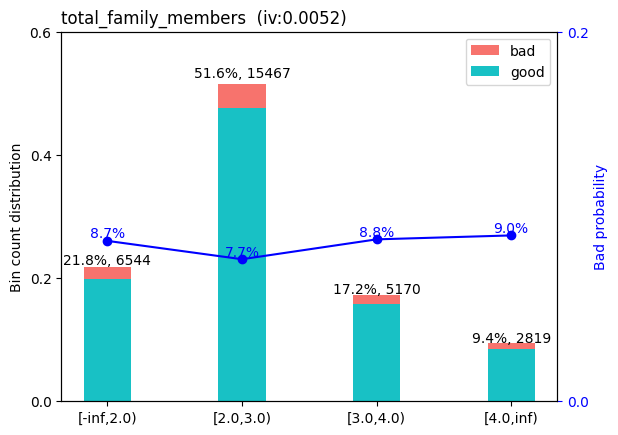

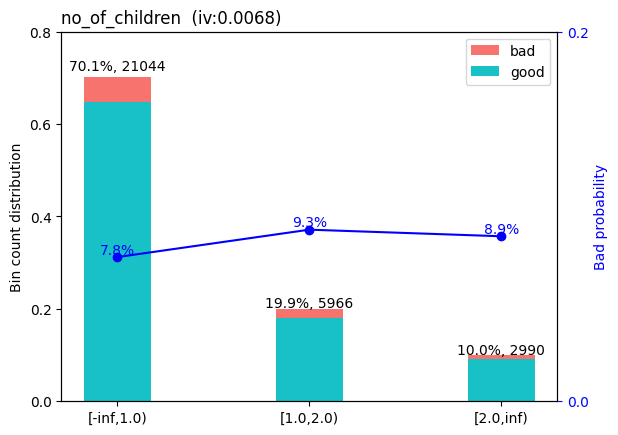

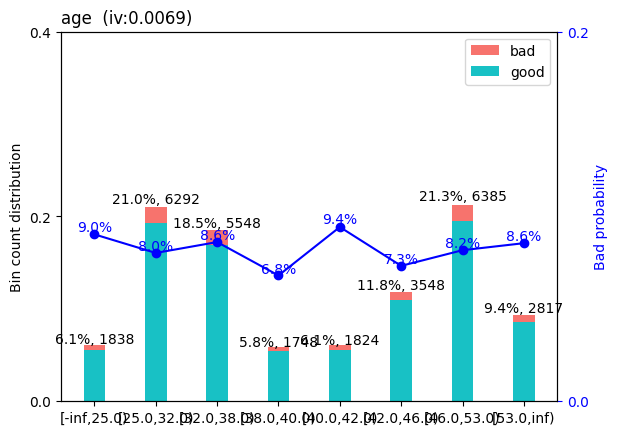

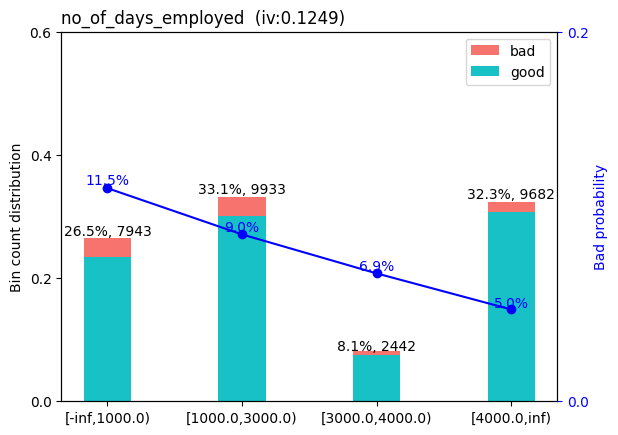

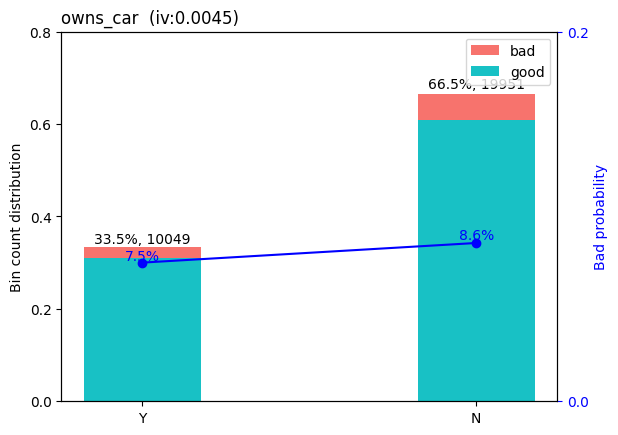

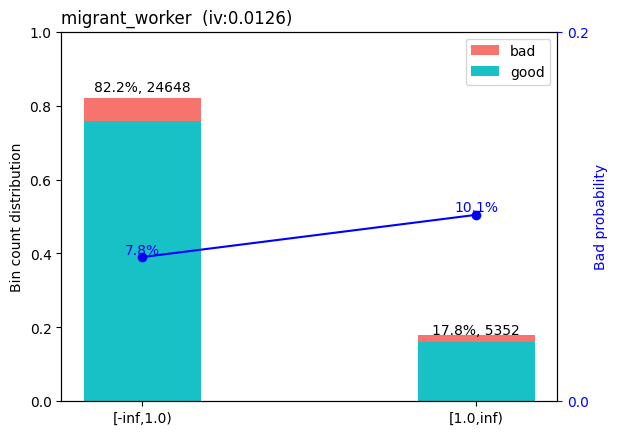

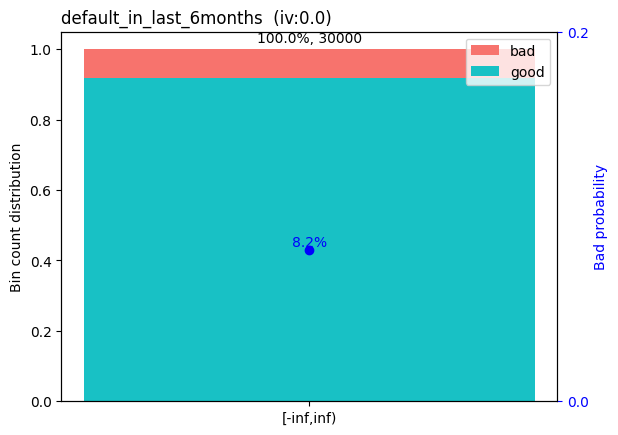

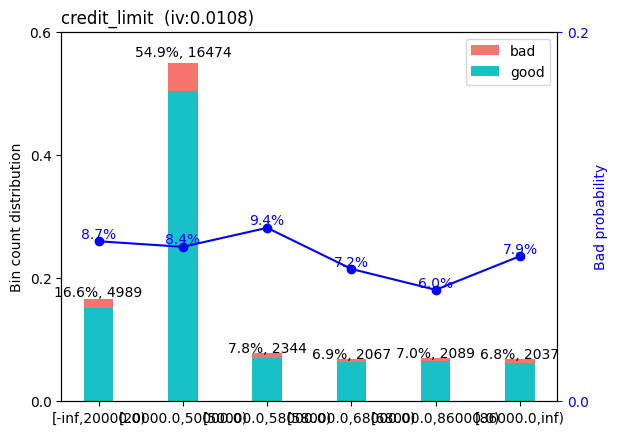

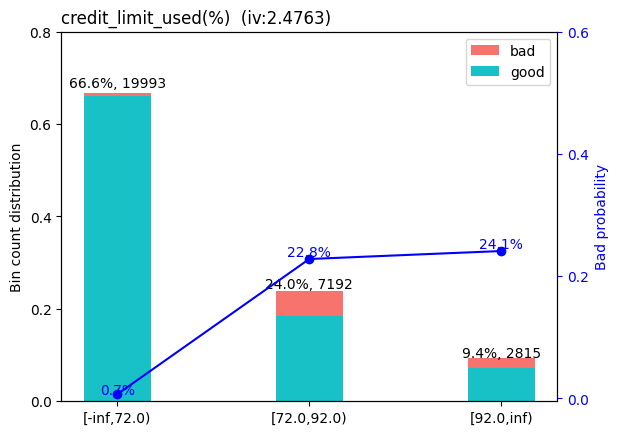

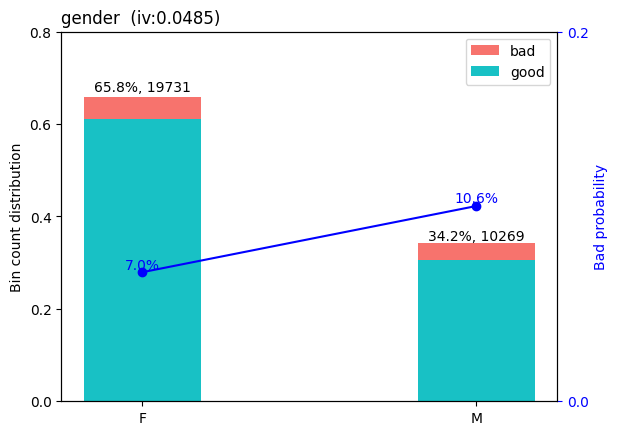

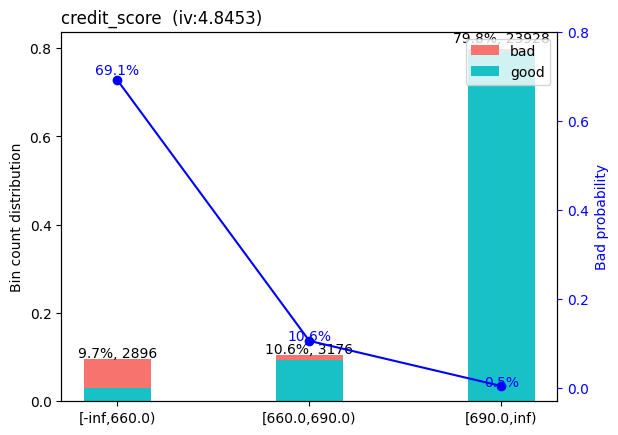

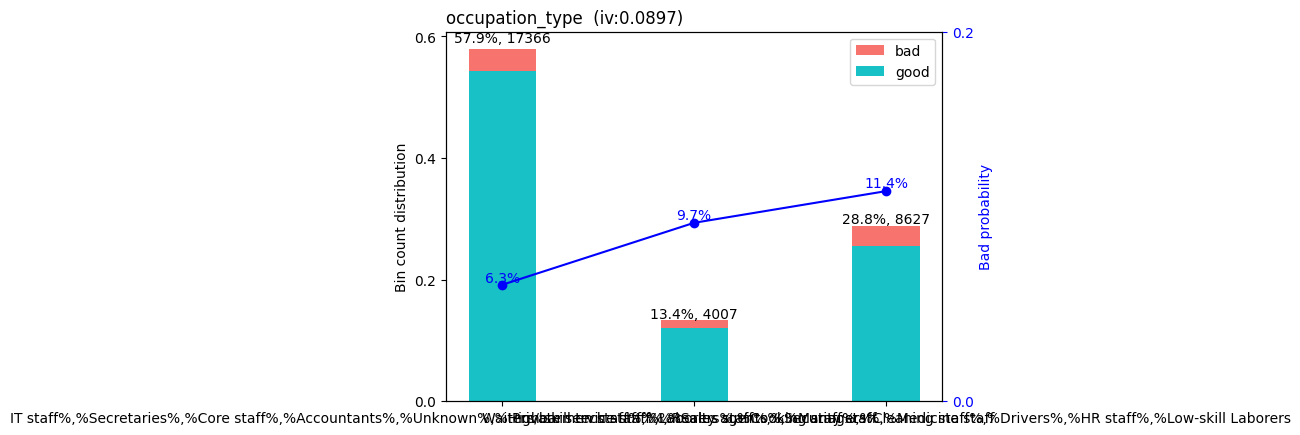

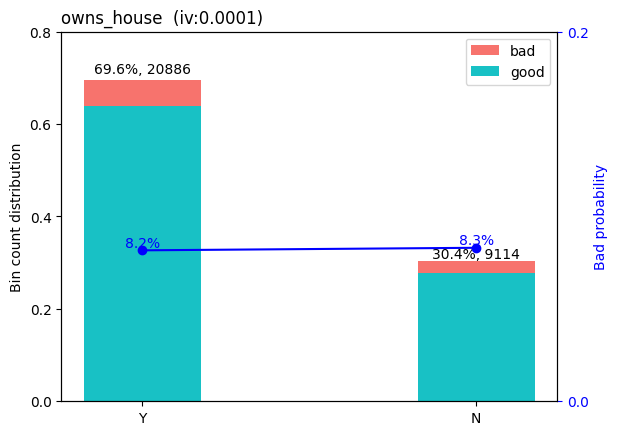

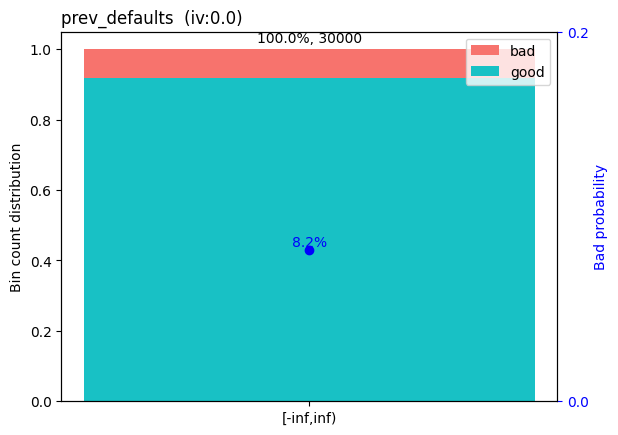

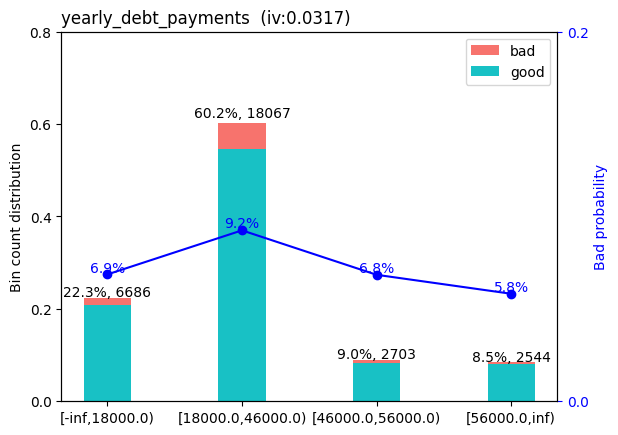

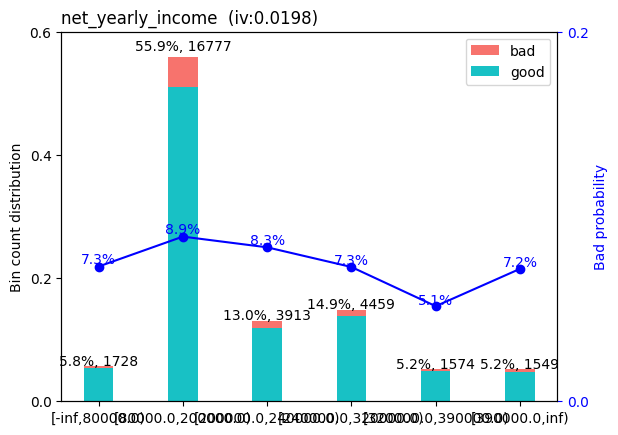

In [92]:
# woe binning ------
bins = sc.woebin(df.drop(columns = ["customer_id", "name"]), y="credit_card_default")
sc.woebin_plot(bins)

In [93]:
# converting train and test into woe values
train_woe = sc.woebin_ply(df, bins)
train_woe.drop(columns = ["customer_id", "name"], inplace = True)
train_woe.head(10)

[INFO] converting into woe values ...


,credit_card_default,total_family_members_woe,no_of_children_woe,age_woe,yearly_debt_payments_woe,no_of_days_employed_woe,owns_car_woe,credit_score_woe,migrant_worker_woe,default_in_last_6months_woe,occupation_type_woe,owns_house_woe,credit_limit_woe,gender_woe,prev_defaults_woe,net_yearly_income_woe,credit_limit_used(%)_woe
34126,0,0.060765,-0.055311,-0.004599,-0.193449,-0.537050,0.046332,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.019562,-0.175009,0.0,-0.132349,-2.518964
44609,0,-0.071457,-0.055311,-0.024660,0.130535,-0.537050,0.046332,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.019562,-0.175009,0.0,0.089601,-2.518964
44264,1,-0.071457,-0.055311,-0.202448,0.130535,-0.537050,0.046332,0.286341,-0.055429,0.0,-0.284480,-0.005566,0.019562,-0.175009,0.0,0.089601,1.195478
33556,0,0.071114,0.134941,0.052665,-0.196714,0.104234,-0.097689,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.019562,-0.175009,0.0,0.015976,-2.518964
28050,0,-0.071457,-0.055311,0.044954,-0.196714,-0.537050,-0.097689,-2.851316,-0.055429,0.0,-0.284480,-0.005566,-0.148197,0.278268,0.0,0.089601,-2.518964
4448,0,0.097436,0.091910,-0.202448,-0.193449,0.104234,0.046332,-2.851316,-0.055429,0.0,0.360785,-0.005566,0.058156,0.278268,0.0,0.089601,-2.518964
15054,0,0.060765,-0.055311,-0.024660,-0.196714,0.104234,0.046332,-2.851316,-0.055429,0.0,-0.284480,0.012659,-0.148197,0.278268,0.0,0.089601,-2.518964
26095,0,0.097436,0.091910,0.052665,0.130535,0.104234,-0.097689,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.058156,-0.175009,0.0,0.089601,-2.518964
2593,0,-0.071457,0.134941,0.052665,0.130535,0.376652,0.046332,-2.851316,-0.055429,0.0,0.360785,-0.005566,0.058156,-0.175009,0.0,0.089601,-2.518964
297,0,0.071114,0.134941,-0.024660,0.130535,-0.537050,0.046332,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.146722,-0.175009,0.0,0.015976,-2.518964


In [94]:
# dropping text columns that aren't necessary like 'customer_id' and 'name'
old_df = df.copy()

df.drop(['customer_id', 'name'], axis=1, inplace=True)
df.drop(low_IV_cols, axis=1, inplace=True)
df.head()

,gender,no_of_days_employed,occupation_type,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default
34126,F,4181.0,Unknown,23,807.0,0,0
44609,F,365250.0,Unknown,60,858.0,0,0
44264,F,365241.0,Unknown,81,667.0,0,1
33556,F,1882.0,Managers,32,690.0,0,0
28050,M,365244.0,Unknown,65,721.0,0,0


## Encoding

In [95]:
df["gender"] = df["gender"].apply(lambda x : 1 if x == "F" else 0)
#df["owns_car"] = df["owns_car"].apply(lambda x : 1 if x == "Y" else 0)
#df["owns_house"] = df["owns_house"].apply(lambda x : 1 if x == "Y" else 0)

In [96]:
occupation_type_encoded_df = pd.get_dummies(df["occupation_type"], prefix= "occupation")
df = pd.concat([df, occupation_type_encoded_df], axis=1)
df.drop(columns=["occupation_type"], inplace=True)
df.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,credit_card_default,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
34126,1,4181.0,23,807.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44609,1,365250.0,60,858.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
44264,1,365241.0,81,667.0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
33556,1,1882.0,32,690.0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
28050,0,365244.0,65,721.0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


## Split dataset

In [97]:
# split train-test data
X = df.drop(['credit_card_default'], axis=1)
y = df['credit_card_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (21000, 24) (9000, 24)
y= (21000,) (9000,)


In [98]:
X_train.head()

,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
26658,1,365246.0,96,922.0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5389,1,1206.0,16,711.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8704,1,4040.0,18,761.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
37747,0,96.0,51,854.0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
27346,0,5326.0,92,700.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [99]:
y_train

,credit_card_default
26658,0
5389,0
8704,0
37747,0
27346,0
...,...
34093,0
823,0
32715,0
14006,0


In [100]:
# WOE data
X_woe = train_woe.drop(['credit_card_default'], axis=1)
y_woe = train_woe['credit_card_default']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (21000, 16) (9000, 16)
y= (21000,) (9000,)


In [101]:
X_train_woe.head()

,total_family_members_woe,no_of_children_woe,age_woe,yearly_debt_payments_woe,no_of_days_employed_woe,owns_car_woe,credit_score_woe,migrant_worker_woe,default_in_last_6months_woe,occupation_type_woe,owns_house_woe,credit_limit_woe,gender_woe,prev_defaults_woe,net_yearly_income_woe,credit_limit_used(%)_woe
26658,-0.071457,-0.055311,0.052665,-0.193449,-0.537050,0.046332,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.146722,-0.175009,0.0,0.015976,1.268081
5389,0.071114,0.134941,0.044954,0.130535,0.104234,0.046332,-2.851316,0.226851,0.0,0.360785,-0.005566,0.058156,-0.175009,0.0,-0.128576,-2.518964
8704,0.071114,0.134941,0.104362,-0.193449,-0.537050,0.046332,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.019562,-0.175009,0.0,0.089601,-2.518964
37747,0.060765,-0.055311,-0.123203,-0.196714,0.376652,-0.097689,-2.851316,-0.055429,0.0,-0.284480,-0.005566,0.019562,0.278268,0.0,0.015976,-2.518964
27346,-0.071457,-0.055311,0.052665,0.130535,-0.537050,0.046332,-2.851316,-0.055429,0.0,0.360785,0.012659,0.146722,0.278268,0.0,0.089601,1.268081


In [102]:
y_woe

,credit_card_default
34126,0
44609,0
44264,1
33556,0
28050,0
...,...
37523,0
36228,0
32772,0
9762,0


## Scaling data

In [103]:
# scaling the features to standardize
scaler = MinMaxScaler()

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## Data Imbalancing Handling

In [104]:
# initialize SMOTE method
sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [105]:
print("Dimension of X_train_sm Shape:", X_train.shape)
print("Dimension of y_train_sm Shape:", y_train.shape)

Dimension of X_train_sm Shape: (38552, 24)
Dimension of y_train_sm Shape: (38552,)


In [106]:
X_train = pd.DataFrame(data=X_train, columns=cols)
print("X_train.shape:",X_train.shape)
y_train = pd.Series(y_train)
print("y_train.shape:",y_train.shape)
X_train.head()

X_train.shape: (38552, 24)
y_train.shape: (38552,)


,gender,no_of_days_employed,credit_limit_used(%),credit_score,default_in_last_6months,occupation_Accountants,occupation_Cleaning staff,occupation_Cooking staff,occupation_Core staff,occupation_Drivers,occupation_HR staff,occupation_High skill tech staff,occupation_IT staff,occupation_Laborers,occupation_Low-skill Laborers,occupation_Managers,occupation_Medicine staff,occupation_Private service staff,occupation_Realty agents,occupation_Sales staff,occupation_Secretaries,occupation_Security staff,occupation_Unknown,occupation_Waiters/barmen staff
0,1.0,0.999984,0.969697,0.939866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.003296,0.161616,0.469933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.011055,0.181818,0.581292,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000257,0.515152,0.788419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014576,0.929293,0.445434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
y_train.value_counts(normalize=True)

,proportion
credit_card_default,
0,0.5
1,0.5


# Using Logit model in credit scoring:

## Run the logit model for the training set for the initial data

In [108]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(y_train, X_train)
logit_fit = logit.fit()

         Current function value: 0.098695
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     credit_card_default   No. Observations:                38552
Model:                           Logit   Df Residuals:                    38528
Method:                            MLE   Df Model:                           23
Date:                 Mon, 09 Dec 2024   Pseudo R-squ.:                  0.8576
Time:                         16:39:30   Log-Likelihood:                -3804.9
converged:                       False   LL-Null:                       -26722.
Covariance Type:             nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
gender                              -0.1955      0.072     -2.731      0.006      -0.336      -0.055
no_of_days_employed                 -0.3089      0.115     -2.676      0.007      -0.535      -0.083
credit_limit_used(%)                 9.2967      0.219     42.504      0.000       8.868       9.725
credit_score                       -26.3302      0.615    -42.825      0.000     -27.535     -25.125
default_in_last_6months            216.5010   1.34e+04      0.016      0.987   -2.61e+04    2.65e+04
occupation_Accountants               3.8706      0.315     12.299      0.000       3.254       4.487
occupation_Cleaning staff            4.3175      0.348     12.407      0.000       3.635       5.000
occupation_Cooking staff             4.5699      0.331     13.791      0.000       3.920       5.219
occupation_Core staff                4.1222      0.286     14.414      0.000       3.562       4.683
occupation_Drivers                   4.1146      0.283     14.552      0.000       3.560       4.669
occupation_HR staff                  1.1312      1.233      0.918      0.359      -1.285       3.547
occupation_High skill tech staff     2.8968      0.318      9.113      0.000       2.274       3.520
occupation_IT staff                 -3.2122      3.654     -0.879      0.379     -10.374       3.949
occupation_Laborers                  3.9506      0.271     14.559      0.000       3.419       4.482
occupation_Low-skill Laborers        3.9416      0.412      9.569      0.000       3.134       4.749
occupation_Managers                  3.5844      0.290     12.379      0.000       3.017       4.152
occupation_Medicine staff            3.4496      0.333     10.346      0.000       2.796       4.103
occupation_Private service staff     2.4504      0.430      5.695      0.000       1.607       3.294
occupation_Realty agents             2.4885      0.792      3.143      0.002       0.937       4.040
occupation_Sales staff               3.9199      0.280     14.009      0.000       3.371       4.468
occupation_Secretaries               2.2090      0.592      3.729      0.000       1.048       3.370
occupation_Security staff            3.0221      0.347      8.710      0.000       2.342       3.702
occupation_Unknown                   3.5768      0.276     12.957      0.000       3.036       4.118
occupation_Waiters/barmen staff      5.1816      0.430     12.037      0.000       4.338       6.025
====================================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Run the logit model for the training set for data using WOE

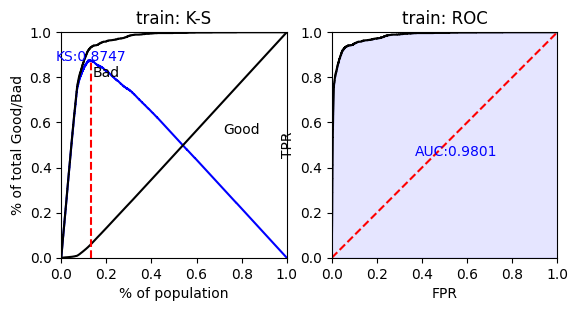

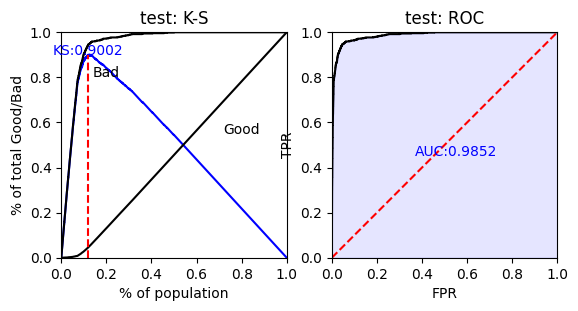

/usr/local/lib/python3.10/dist-packages/scorecardpy/scorecard.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [110]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)
# credit score
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [112]:
score

,age_points,yearly_debt_payments_points,no_of_days_employed_points,owns_car_points,credit_score_points,migrant_worker_points,occupation_type_points,credit_limit_points,gender_points,net_yearly_income_points,credit_limit_used(%)_points,score
34126,0.0,15.0,34.0,-6.0,201.0,1.0,7.0,-2.0,10.0,1.0,177.0,997.0
44609,1.0,-10.0,34.0,-6.0,201.0,1.0,7.0,-2.0,10.0,-1.0,177.0,971.0
44264,9.0,-10.0,34.0,-6.0,-20.0,1.0,7.0,-2.0,10.0,-1.0,-84.0,497.0
33556,-2.0,15.0,-7.0,13.0,201.0,1.0,7.0,-2.0,10.0,-0.0,177.0,972.0
28050,-2.0,15.0,34.0,13.0,201.0,1.0,7.0,12.0,-15.0,-1.0,177.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37523,1.0,-10.0,34.0,-6.0,201.0,1.0,7.0,-2.0,10.0,-1.0,177.0,971.0
36228,1.0,-10.0,-24.0,-6.0,201.0,1.0,-9.0,-5.0,10.0,-1.0,177.0,894.0
32772,0.0,15.0,-7.0,-6.0,201.0,1.0,-4.0,-2.0,10.0,-0.0,177.0,944.0
9762,1.0,-10.0,-24.0,-6.0,201.0,1.0,-9.0,-2.0,-15.0,-1.0,177.0,872.0


(array([ 1471.,   661.,   407.,  1201.,   447.,  5736.,  2845.,   937.,
        13188.,  3107.]),
 array([ 167. ,  257.4,  347.8,  438.2,  528.6,  619. ,  709.4,  799.8,
         890.2,  980.6, 1071. ]),
 <BarContainer object of 10 artists>)

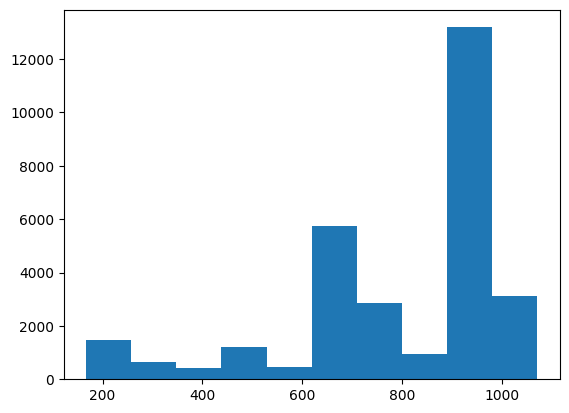

In [113]:
plt.hist(score["score"])

## Use different models for Credit Risk Analysis

In [114]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)

    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)

    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)

    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)

    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)


In [115]:
y_test

,credit_card_default
11858,0
22651,0
38925,0
2917,0
18012,0
...,...
37539,0
17978,1
5227,0
3994,0


## Logisitc Regression

In [116]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [117]:
# prediction
evaluation(logreg)

[[18245  1031]
 [  611 18665]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     19276
           1       0.95      0.97      0.96     19276

    accuracy                           0.96     38552
   macro avg       0.96      0.96      0.96     38552
weighted avg       0.96      0.96      0.96     38552

Accuracy of TRAIN data: 95.74081759701183
F1_Score of TRAIN data: 95.74031202556064
[[7800  461]
 [  19  720]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8261
           1       0.61      0.97      0.75       739

    accuracy                           0.95      9000
   macro avg       0.80      0.96      0.86      9000
weighted avg       0.97      0.95      0.95      9000

Accuracy of TEST data: 94.66666666666667
F1_Score of TEST data: 86.00746268656717
RMSE:  0.23094010767585033
ROC AUC score:  0.9592425992390677


## Decision Tree

In [118]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [119]:
# prediction
evaluation(tree_model)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8049  212]
 [  88  651]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.75      0.88      0.81       739

    accuracy                           0.97      9000
   macro avg       0.87      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.66666666666667
F1_Score of TEST data: 89.72195841915497
RMSE:  0.18257418583505536
ROC AUC score:  0.9276287048441092


## Random Forest

In [120]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [121]:
# prediction
evaluation(regr_rfr)

[[19276     0]
 [    0 19276]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19276
           1       1.00      1.00      1.00     19276

    accuracy                           1.00     38552
   macro avg       1.00      1.00      1.00     38552
weighted avg       1.00      1.00      1.00     38552

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[8016  245]
 [  70  669]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.73      0.91      0.81       739

    accuracy                           0.96      9000
   macro avg       0.86      0.94      0.90      9000
weighted avg       0.97      0.96      0.97      9000

Accuracy of TEST data: 96.5
F1_Score of TEST data: 89.50838979096383
RMSE:  0.18708286933869708
ROC AUC score:  0.9378099877163822


## CatBoost

In [122]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)

Learning rate set to 0.048998
0:	learn: 0.5821771	total: 71.7ms	remaining: 1m 11s
1:	learn: 0.4555877	total: 104ms	remaining: 51.7s
2:	learn: 0.3595329	total: 130ms	remaining: 43.3s
3:	learn: 0.3106778	total: 144ms	remaining: 35.9s
4:	learn: 0.2697028	total: 155ms	remaining: 30.8s
5:	learn: 0.2387671	total: 166ms	remaining: 27.5s
6:	learn: 0.1946606	total: 177ms	remaining: 25.1s
7:	learn: 0.1764063	total: 190ms	remaining: 23.6s
8:	learn: 0.1538568	total: 201ms	remaining: 22.2s
9:	learn: 0.1413217	total: 213ms	remaining: 21.1s
10:	learn: 0.1257602	total: 225ms	remaining: 20.2s
11:	learn: 0.1140674	total: 236ms	remaining: 19.5s
12:	learn: 0.1040013	total: 247ms	remaining: 18.8s
13:	learn: 0.0966850	total: 258ms	remaining: 18.2s
14:	learn: 0.0912453	total: 269ms	remaining: 17.7s
15:	learn: 0.0879684	total: 280ms	remaining: 17.2s
16:	learn: 0.0846554	total: 295ms	remaining: 17s
17:	learn: 0.0829257	total: 309ms	remaining: 16.8s
18:	learn: 0.0805997	total: 321ms	remaining: 16.6s
19:	learn: 

In [123]:
# prediction
evaluation(reg_catb)

[[19064   212]
 [   25 19251]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.38524590163934
F1_Score of TRAIN data: 99.38523143721889
[[8052  209]
 [  80  659]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.76      0.89      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.78888888888889
F1_Score of TEST data: 90.12661580817256
RMSE:  0.17919573407620817
ROC AUC score:  0.9332230008162323


## XGBoost

In [124]:
xgb_model = XGBClassifier(random_seed=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:40:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_seed=42, ...)

In [125]:
# prediction
evaluation(xgb_model)

[[19083   193]
 [   29 19247]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19276
           1       0.99      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.42415438887735
F1_Score of TRAIN data: 99.4241439679159
[[8052  209]
 [  67  672]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.76      0.91      0.83       739

    accuracy                           0.97      9000
   macro avg       0.88      0.94      0.91      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.93333333333334
F1_Score of TEST data: 90.63899063899063
RMSE:  0.17511900715418263
ROC AUC score:  0.9420186706403191


In [126]:
xgb_model.feature_importances_

array([0.00966907, 0.01233548, 0.1201108 , 0.6450812 , 0.01976914,
       0.00946563, 0.01272448, 0.00868787, 0.01251401, 0.01120354,
       0.        , 0.01693622, 0.        , 0.01113195, 0.00629321,
       0.00956578, 0.00670754, 0.02435966, 0.00187226, 0.01549326,
       0.02041987, 0.00571754, 0.01331052, 0.00663097], dtype=float32)

In [127]:
from xgboost import plot_importance

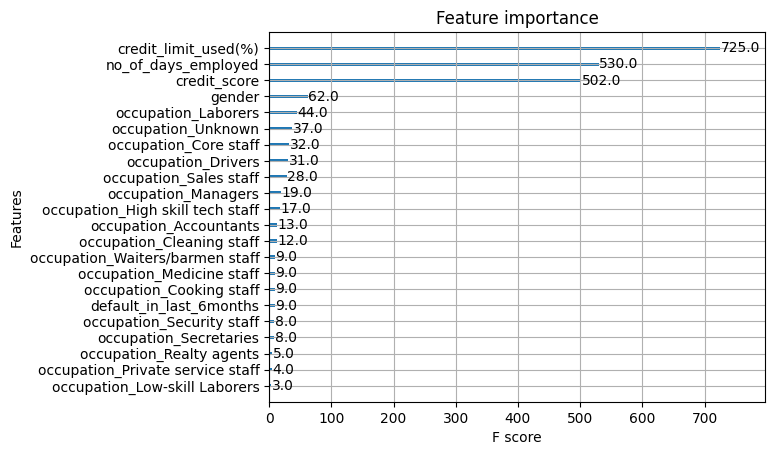

<Figure size 640x480 with 0 Axes>

In [128]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

## LightGBM

In [129]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19276, number of negative: 19276
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 38552, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [130]:
# prediction
evaluation(lgbm_model)

[[18968   308]
 [   35 19241]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19276
           1       0.98      1.00      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.11029259182403
F1_Score of TRAIN data: 99.11024797481507
[[8024  237]
 [  62  677]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8261
           1       0.74      0.92      0.82       739

    accuracy                           0.97      9000
   macro avg       0.87      0.94      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.67777777777778
F1_Score of TEST data: 90.0412969761847
RMSE:  0.18226964152656422
ROC AUC score:  0.9437069104891351


## KNN

In [131]:
#iterating knn model for all values of k from 1-39
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

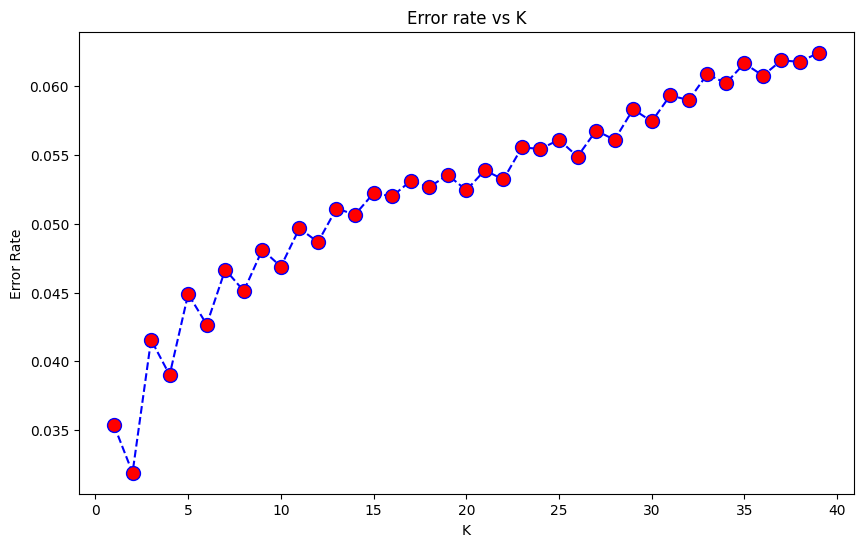

In [132]:
#error_rate

plt.figure(figsize=[10,6])
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed',
          marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

k = 2 seems the best option

In [133]:
# # building knn and fit the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [134]:
# # Evaluation
evaluation(knn)

[[19276     0]
 [  243 19033]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19276
           1       1.00      0.99      0.99     19276

    accuracy                           0.99     38552
   macro avg       0.99      0.99      0.99     38552
weighted avg       0.99      0.99      0.99     38552

Accuracy of TRAIN data: 99.36968250674414
F1_Score of TRAIN data: 99.36965746322618
[[8066  195]
 [  92  647]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8261
           1       0.77      0.88      0.82       739

    accuracy                           0.97      9000
   macro avg       0.88      0.93      0.90      9000
weighted avg       0.97      0.97      0.97      9000

Accuracy of TEST data: 96.81111111111112
F1_Score of TEST data: 90.04947870709792
RMSE:  0.17857460314638499
ROC AUC score:  0.9259512760203765
